**06 – Decision Trees**

In [1]:
import numpy as np
import os
np.random.seed(42)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Training and visualizing

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] 
y = iris.target

In [3]:
import pandas as pd
pd.DataFrame(iris.data, columns=iris.feature_names).head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [4]:
values, counts = np.unique(y, return_counts=True)
dict(zip(values, counts))

{0: 50, 1: 50, 2: 50}

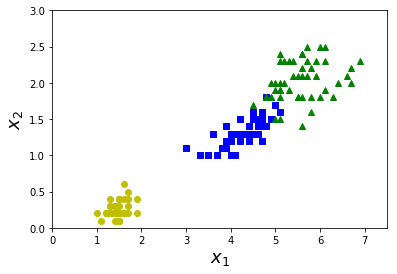

In [5]:
def plot_data(X, y, axes=[0, 7.5, 0, 3]):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$x_2$", fontsize=18, rotation=90)
plot_data(X,y)

Train DecisionTreeClassifier

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

Make graph of the tree

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

## Install graphviz

1. Download graphviz at: www.graphviz.org/

2. Set the path variable to: 
C:\Program Files (x86)\Graphviz2.38

3. in the anaconda prompt, run

> conda install -c conda-forge graphviz

In [8]:
!dot -Tpng iris_tree.dot -o iris_tree2.png

![](iris_tree2.png)

### Feature importance

In [9]:
tree_clf.feature_importances_

array([ 0.56199095,  0.43800905])

In [10]:
ginis = tree_clf.tree_.impurity
samples = tree_clf.tree_.n_node_samples
samples

array([150,  50, 100,  54,  46], dtype=int64)

In [11]:
fea_imp_petal = ginis[0]*samples[0] - ginis[1]*samples[1] - ginis[2]*samples[2]
fea_imp_width = ginis[2]*samples[2] - ginis[3]*samples[3] - ginis[4]*samples[4]
fea_imp_petal/(fea_imp_petal+fea_imp_width)

0.56199095022624435

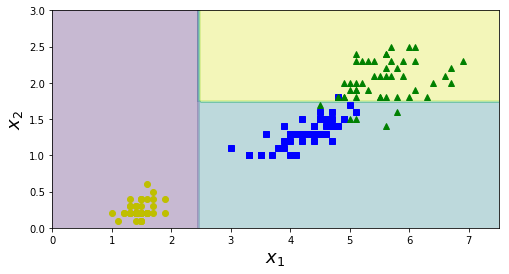

In [12]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3)
    plot_data(X, y)
    plt.axis(axes)
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, )

plt.show()

# Predicting classes and class probabilities

In [13]:
x_new=[[5, 1.5]]

In [14]:
# predict probability
tree_clf.predict_proba(x_new)

array([[ 0.        ,  0.90740741,  0.09259259]])

In [15]:
# predict class
tree_clf.predict(x_new)

array([1])

# Regularization Hyperparameters

- max_depth
(the maximum depth of the Decision Tree)
- min_samples_split 
(the minimum number of samples a node must have before it can be split)
- min_samples_leaf 
(the minimum number of samples a leaf node must have)
- min_weight_fraction_leaf 
(same as min_samples_leaf but expressed as a fraction of the total number of weighted instances)
- max_leaf_nodes 
(maximum number of leaf nodes)
- max_features 
(maximum number of features that are evaluated for splitting at each node)


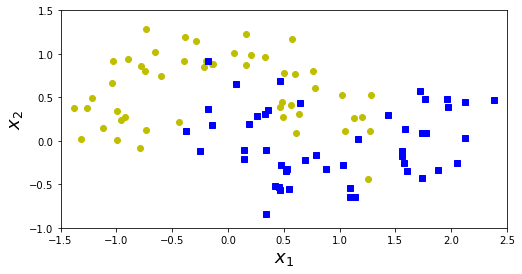

In [16]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)
plt.figure(figsize=(8, 4))
plot_data(Xm, ym, axes=[-1.5, 2.5, -1, 1.5])

Train DecisionTreeClassifier & regularize

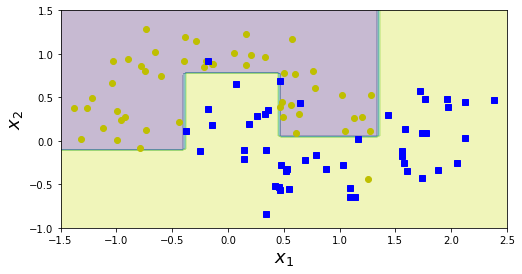

In [17]:
deep_tree_clf = DecisionTreeClassifier(min_samples_split=10, max_depth=10, random_state=42)
deep_tree_clf.fit(Xm, ym)

plt.figure(figsize=(8, 4))
plot_decision_boundary(deep_tree_clf, Xm, ym, axes=[-1.5, 2.5, -1, 1.5])

plt.show()

# Regression trees

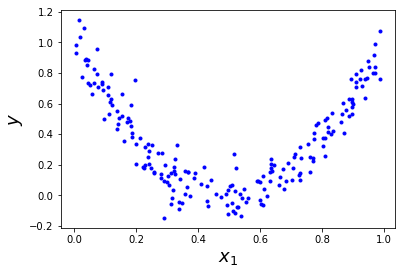

In [18]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

def plot_quad(X, y):
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", fontsize=18)
plot_quad(X, y)

Train DecisionTreeRegressor & regularize

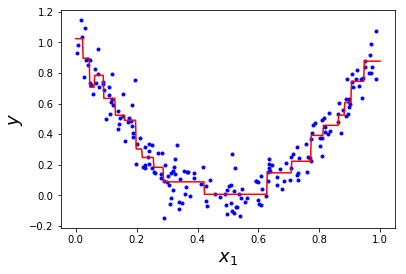

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 5, 
                                 min_samples_leaf=3,
                                 min_samples_split = 10 , 
                                 random_state=42)
tree_reg.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)

plot_quad(X, y)
plt.plot(x1, y_pred, 'r')

Create graph of the tree

In [20]:
export_graphviz(
        tree_reg,
        out_file="regression_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

In [21]:
!dot -Tpng regression_tree.dot -o regression_tree.png

![](regression_tree.png)